In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from mplsoccer import Sbopen
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable

In [2]:
# instantiate a parser object
parser = Sbopen()
df_competition = parser.competition()
df_competition.iloc[np.where(df_competition["competition_name"]== "Premier League")]
df_competition.sort_values(by='season_name')
df_competition.to_excel("comp.xlsx")

In [7]:
# 2015-2016 chosen for portfolio
df_match = parser.match(competition_id=16, season_id=26)
df_match

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,18242,2015-06-06,2015-06-06 20:45:00,1,3,available,scheduled,2020-07-29 05:00:00,2021-06-13 16:17:31.694,1,...,26,Final,367,Olympiastadion Berlin,85,Germany,581,Cüneyt Çakιr,233,Turkey


In [12]:
final_matches = df_match.copy()
final_matches.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,18242,2015-06-06,2015-06-06 20:45:00,1,3,available,scheduled,2020-07-29 05:00:00,2021-06-13 16:17:31.694,1,...,26,Final,367,Olympiastadion Berlin,85,Germany,581,Cüneyt Çakιr,233,Turkey


In [15]:
final_lineups = []
for i in final_matches.match_id:
    final_lineups.append(parser.lineup(i))
final_lineups = pd.concat(final_lineups)
final_lineups

,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
0,3477,Álvaro Borja Morata Martín,Álvaro Morata,9,18242,224,Juventus,214,Spain
1,3486,Fernando Llorente Torres,Fernando Llorente,14,18242,224,Juventus,214,Spain
2,3579,Roberto Maximiliano Pereyra,Roberto Pereyra,37,18242,224,Juventus,11,Argentina
3,3843,Angelo Obinze Ogbonna,Angelo Ogbonna,5,18242,224,Juventus,112,Italy
4,5541,Stephan Lichtsteiner,Stephan Lichtsteiner,26,18242,224,Juventus,221,Switzerland
5,6943,Andrea Barzagli,Andrea Barzagli,15,18242,224,Juventus,112,Italy
6,6949,Gianluigi Buffon,Gianluigi Buffon,1,18242,224,Juventus,112,Italy
7,7013,Stefano Sturaro,Stefano Sturaro,27,18242,224,Juventus,112,Italy
8,7173,Leonardo Bonucci,Leonardo Bonucci,19,18242,224,Juventus,112,Italy
9,7952,Simone Padoin,Simone Padoin,20,18242,224,Juventus,112,Italy


In [16]:
df_event, df_related, df_freeze, df_tactics = parser.event(18242)

# exploring the data
df_event.info()
#df_related.info()
#df_freeze.info()
#df_tactics.info()
df_event = df_event.merge(final_lineups[['player_id','player_nickname']],on="player_id",how="left")
print(df_event.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 69 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3433 non-null   object 
 1   index                           3433 non-null   int64  
 2   period                          3433 non-null   int64  
 3   timestamp                       3433 non-null   object 
 4   minute                          3433 non-null   int64  
 5   second                          3433 non-null   int64  
 6   possession                      3433 non-null   int64  
 7   duration                        2565 non-null   float64
 8   match_id                        3433 non-null   int64  
 9   type_id                         3433 non-null   int64  
 10  type_name                       3433 non-null   object 
 11  possession_team_id              3433 non-null   int64  
 12  possession_team_name            34

In [47]:
df_event[df_event.outcome_name.isna() == False].outcome_name.value_counts()

Incomplete          228
Complete             15
Lost In Play         14
Off T                14
Success In Play      12
Out                  11
Lost Out             10
Saved                10
Won                   8
Tactical              6
Success               5
Goal                  4
No Touch              4
Touched Out           3
In Play Danger        3
Unknown               3
Wayward               3
Blocked               1
Saved Twice           1
Pass Offside          1
Claim                 1
In Play Safe          1
Injury Clearance      1
Name: outcome_name, dtype: int64

In [9]:
# METRICS
# rakip ceza sahasında topla buluşma
# 

In [48]:
pitch = Pitch(pitch_type="statsbomb",pitch_color='#40A03F', stripe_color='#389C39', line_color='white', stripe=True, corner_arcs=True,line_zorder=3)
pitch_gray = Pitch(pitch_type="statsbomb",pitch_color='#C1C1C1', line_color='black', stripe=False, corner_arcs=True,line_zorder=2)
#C1C1C1
#fig, ax = pitch.draw(figsize=(10, 7.727))

551


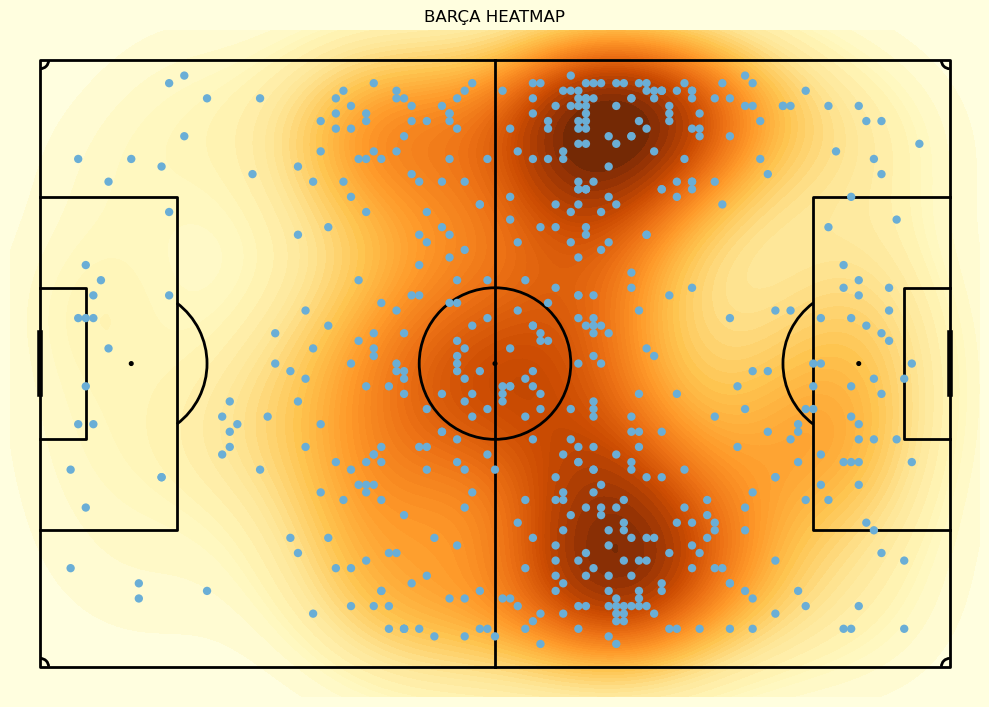

In [49]:
import seaborn as sns
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
plt.gca().invert_yaxis()
df_ball_receipts = df_event[(df_event['type_name'] == 'Ball Receipt')&(df_event['team_name'] == 'Barcelona')]
print(len(df_ball_receipts))
# Plot the pass receipt locations
#pitch.scatter(, df_passes['end_y'], s=20, color='purple',alpha=.6 ,ax=ax)

#sns.scatterplot(x='end_x', y='end_y', data=df_passes, hue='team_name', ec=None,alpha=.6, palette='Set1',zorder=2, legend=False)
sns.scatterplot(x='x', y='y', data=df_ball_receipts, hue='team_name', ec=None,alpha=1, palette='Blues',zorder=3, legend=False)
sns.kdeplot(x='x', y='y', data=df_ball_receipts, fill=True, thresh=0, n_levels=50, cmap="YlOrBr",zorder=1)#FFFEDF

plt.title("BARÇA HEATMAP")
plt.show()

In [50]:
df_ball_receipts = df_event
df_ball_receipts.columns
df_ball_receipts[["x","y","end_x","end_y","timestamp","period"]].sort_values(by=["period","timestamp"]).iloc[0].values
for i in range(0,50):
    print(i,df_ball_receipts.sort_values(by=["period","timestamp"]).iloc[i].values)
df_ball_receipts[["x","y","end_x","end_y","timestamp","period"]].sort_values(by=["period","timestamp"]).iloc[46]

0 ['909010e7-ef6c-4a0d-b314-abfad5659cd5' 1 1 datetime.time(0, 0) 0 0 1 0.0
 18242 35 'Starting XI' 224 'Juventus' 1 'Regular Play' 224 'Juventus'
 '41212' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
1 ['ae41ae3a-46d6-4dc2-a135-25bcbb5b3abd' 2 1 datetime.time(0, 0) 0 0 1 0.0
 18242 35 'Starting XI' 224 'Juventus' 1 'Regular Play' 217 'Barcelona'
 '41221' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
2 ['6b3a74c6-b09e-4e74-a628-9dce9aee1ac7' 3 1 datetime.time(0, 0) 0 0 1 0.0
 18242 18 'Half Start' 224 'Juventus' 1 'Regular Play' 224 'Juventus' None
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan na

x                        4.0
y                       26.0
end_x                    6.0
end_y                   27.0
timestamp    00:00:43.746000
period                     1
Name: 46, dtype: object

Text(0.5, 1.0, 'Andrés Iniesta Luján Ball Receipts')

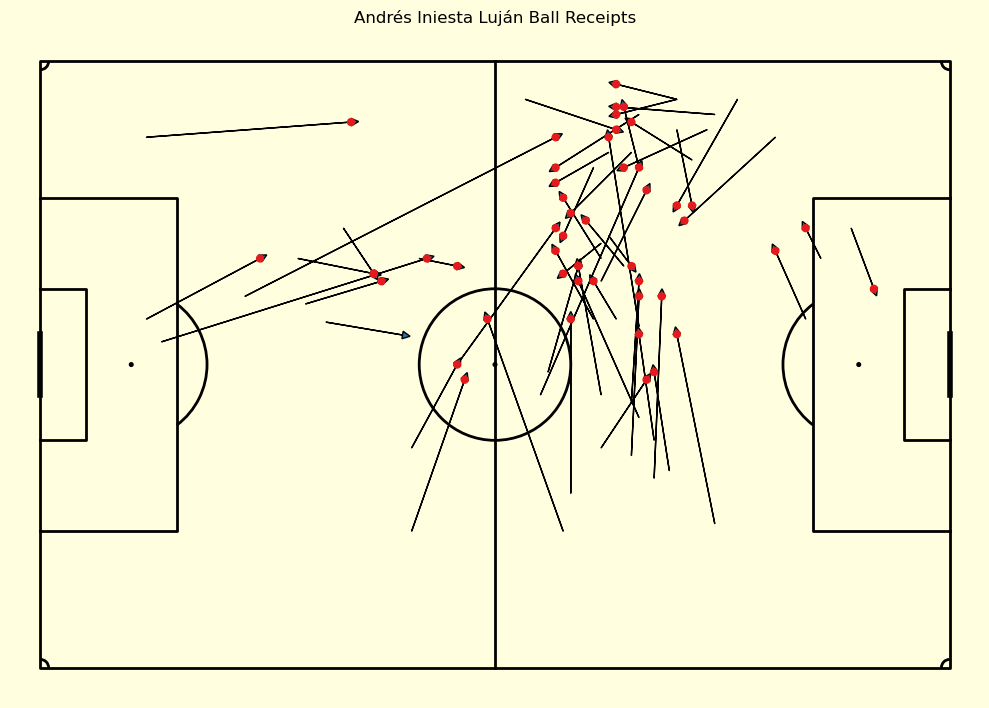

In [51]:
import seaborn as sns
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
#plt.gca().invert_yaxis()
#plt.arrow(57.8,3.8,65.7-57.8,0.6-3.8,head_width=1, head_length=1,zorder=6)
#plt.arrow(55.7,80.0,80.1-55.7,73.7-80.0,head_width=1, head_length=1,zorder=6)
df_ball_receipts = df_event[(df_event['type_name'] == 'Pass')&(df_event['pass_recipient_name'] == 'Andrés Iniesta Luján')&(df_event['outcome_name'].isna())]
sns.scatterplot(x='end_x', y='end_y', data=df_ball_receipts, hue='team_name', ec=None,alpha=1, palette='Set1',zorder=3, legend=False)
plt.arrow(37.7,34.4,47.8-37.7,36.1-34.4,head_width=1, head_length=1,zorder=6)
for i in range(len(df_ball_receipts)):
    x = df_ball_receipts.iloc[i].loc["x"]
    y = df_ball_receipts.iloc[i].loc["y"]
    end_x = df_ball_receipts.iloc[i].loc["end_x"]
    end_y = df_ball_receipts.iloc[i].loc["end_y"]
    plt.arrow(x,y,end_x-x,end_y-y,head_width=1, head_length=1,zorder=2)
plt.title("Andrés Iniesta Luján Ball Receipts")

Text(0.5, 1.0, 'Andrés Iniesta Luján Pass & Heat Map')

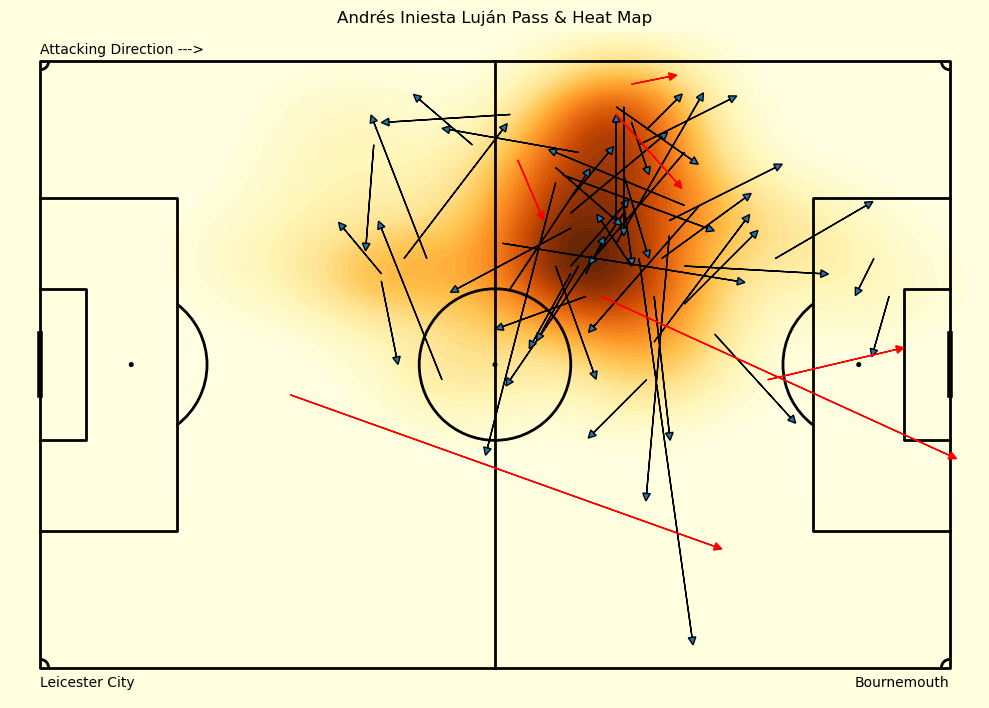

In [52]:
import seaborn as sns
import math
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
#plt.gca().invert_yaxis()
#plt.arrow(57.8,3.8,65.7-57.8,0.6-3.8,head_width=1, head_length=1,zorder=6)
#plt.arrow(55.7,80.0,80.1-55.7,73.7-80.0,head_width=1, head_length=1,zorder=6)
df_passes = df_event[(df_event['type_name'] == 'Pass')&(df_event.player_name == "Andrés Iniesta Luján")]
df_ball_receipts = df_event[(df_event['type_name'] == 'Ball Receipt')&(df_event.player_name == "Andrés Iniesta Luján")]
#sns.scatterplot(x='x', y='y', data=df_passes, ec=None,alpha=1, palette='Set1',zorder=6, legend=False)
sns.kdeplot(x='x', y='y', data=df_ball_receipts, fill=True, thresh=0, n_levels=50, cmap="YlOrBr",zorder=1)#FFFEDF
plt.annotate("Attacking Direction --->",(0,-1))
plt.annotate("Leicester City",(0,82.5))
plt.annotate("Bournemouth", xy=(120, 82.5), horizontalalignment='right')

for i in range(len(df_passes)):
    try:
        if math.isnan(df_passes.iloc[i].loc["outcome_name"]):
            x = df_passes.iloc[i].loc["x"]
            y = df_passes.iloc[i].loc["y"]
            end_x = df_passes.iloc[i].loc["end_x"]
            end_y = df_passes.iloc[i].loc["end_y"]
            plt.arrow(x,y,end_x-x,end_y-y,head_width=1, head_length=1,zorder=6)
    except:
        x = df_passes.iloc[i].loc["x"]
        y = df_passes.iloc[i].loc["y"]
        end_x = df_passes.iloc[i].loc["end_x"]
        end_y = df_passes.iloc[i].loc["end_y"]
        plt.arrow(x,y,end_x-x,end_y-y,head_width=1, head_length=1,zorder=6,color='red')
plt.title(f"{df_passes.player_name.max()} Pass & Heat Map")

In [53]:

df_passes[df_passes.x > 114].pass_recipient_name


Series([], Name: pass_recipient_name, dtype: object)

In [54]:
shots[shots.outcome_name == "Goal"]

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,aerial_won,dribble_nutmeg,foul_committed_offensive,pass_backheel,foul_committed_advantage,dribble_overrun,foul_won_advantage,substitution_replacement_id,substitution_replacement_name,injury_stoppage_in_chain
148,6ff7a431-2cf4-4f5a-8348-256c6dc44dad,148,1,00:03:24.616000,3,24,10,0.441861,18242,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2256,d8de9c17-e485-4624-938f-a340318ba58d,2257,2,00:09:17.750000,54,17,114,0.269100,18242,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2762,344acb91-8f9e-499d-ae65-39d7305e39ad,2763,2,00:22:53.334000,67,53,148,1.040347,18242,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3427,b09ba265-78b8-4bc6-af24-eb3c4047c8e3,3428,2,00:51:40.484000,96,40,194,0.997175,18242,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Import adjustText library


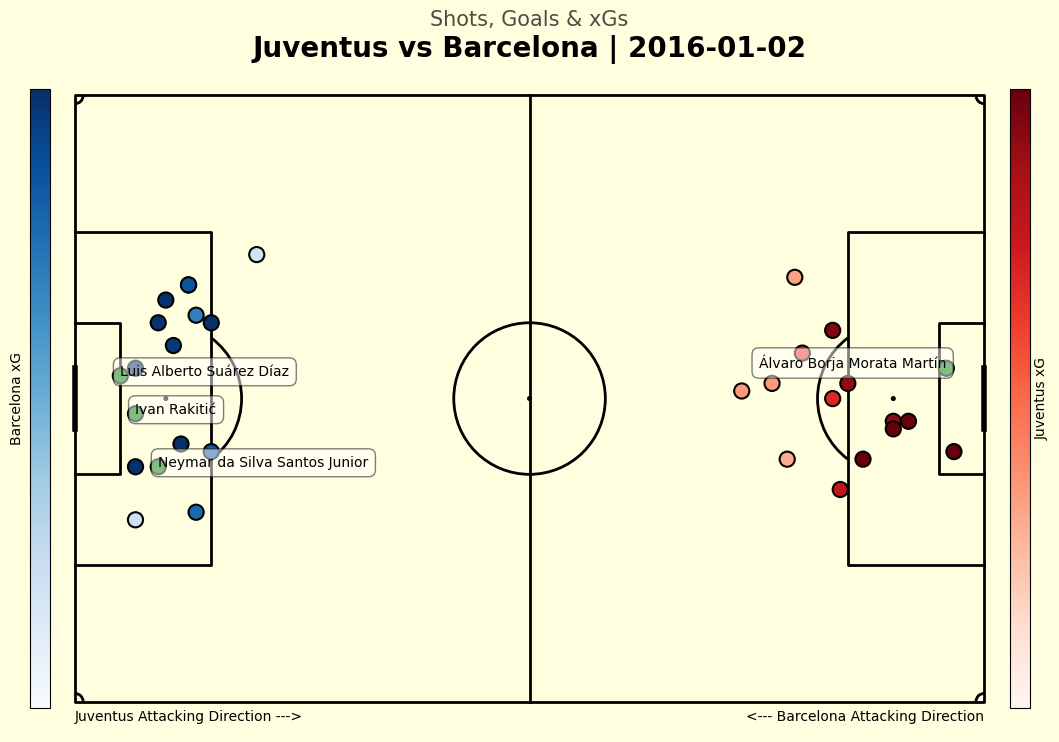

In [68]:
from adjustText import adjust_text
match_id_required = 3754146
home_team_required = final_matches.home_team_name[0]
away_team_required = final_matches.away_team_name[0]
pitchLengthX = 120
pitchWidthY = 80
shots = df_event[df_event.type_name == 'Shot']

figSizeX = 10
figSizeY = 7.727
fig, ax = pitch_gray.draw(figsize=(figSizeX, figSizeY))
home_team_required
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')

plt.Circle((114,50),4,color="blue",zorder=6)
plt.annotate("",(0,-1))
plt.annotate(f"{home_team_required} Attacking Direction --->",(0,82.5))
plt.annotate(f"<--- {away_team_required} Attacking Direction", xy=(120, 82.5), horizontalalignment='right')
goal_coor = []
# Create lists to store text annotations
home_goal_annotations = []
away_goal_annotations = []

# Loop through shots and plot them
for i, shot in shots.iterrows():
    x = shot.x
    y = shot.y
    goal = shot.outcome_name == 'Goal'
    team_name = shot.team_name
    circleRadius = figSizeX * 0.1
    circleLineWidth = circleRadius * 1.5
    
    if team_name == home_team_required:
        if goal:
            goal_coor.append((x, y))
            shotCircle = mpatches.Circle((x, y), radius=circleRadius, facecolor='green', edgecolor="k", linewidth=circleLineWidth, zorder=6)
            ax.add_patch(shotCircle)
            plt.annotate(shot.player_name,(x, y),bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5"),zorder=7,ha='right')
            # Store goal scorer's name for annotation
            home_goal_annotations.append((shot.player_name, x - 1, y + 1))
        else:
            cmap = plt.get_cmap('Reds')
            shotCircle = mpatches.Circle((x,y), radius=circleRadius, edgecolor="k", linewidth=circleLineWidth, facecolor=cmap(shot.shot_statsbomb_xg * 15), zorder=6)
            ax.add_patch(shotCircle)
    elif team_name == away_team_required:
        if goal:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY-y), radius=circleRadius, facecolor='green', edgecolor="k", linewidth=circleLineWidth, zorder=6)
            ax.add_patch(shotCircle)
            # Store goal scorer's name for annotation
            plt.annotate(shot.player_name,(pitchLengthX - x, pitchWidthY-y),bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5"),zorder=7)
            away_goal_annotations.append((shot.player_name, pitchLengthX - x - 1, y + 1))
        else:
            cmap = plt.get_cmap('Blues')
            shotCircle = mpatches.Circle((pitchLengthX - x, y), radius=circleRadius, edgecolor="k", linewidth=circleLineWidth, facecolor=cmap(shot.shot_statsbomb_xg * 15), zorder=6)
            ax.add_patch(shotCircle)
            
#adjust_text([plt.text(x, y, name, ha='right', va='bottom', zorder=7, bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5")) for name, x, y in home_goal_annotations], autoalign='x', only_move={'points':'y', 'text':'y'})
#adjust_text([plt.text(x, y, name, ha='right', va='bottom', zorder=7, bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5")) for name, x, y in away_goal_annotations], autoalign='x', only_move={'points':'y', 'text':'y'})


# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()

# create manual symbols for legend
patch = mpatches.Patch(color='grey', label='manual patch')   
line = Line2D([0], [0], label='manual line', color='k')
point = Line2D([0], [0], label='manual point', marker='s', markersize=10, 
         markeredgecolor='r', markerfacecolor='k', linestyle='')
circ = mpatches.Circle((0,0), radius=circleRadius,edgecolor="k", linewidth=circleRadius*1.5)
# add manual symbols to auto legend
handles.extend([patch, line, point,circ])

# Create a colorbar for Leicester City ('Blues') on the left side
cmap_blue = plt.get_cmap('Blues')
norm_blue = plt.Normalize(vmin=0, vmax=1)  # Modify the limits as needed
sm_blue = ScalarMappable(cmap=cmap_blue, norm=norm_blue)
sm_blue.set_array([])

# Create a separate axis for the Leicester City colorbar
cbar_ax_blue = fig.add_axes([0.0,0.1,0.02,.8])  # Adjust the position and size as needed
cbar_blue = plt.colorbar(sm_blue, cax=cbar_ax_blue)
cbar_blue.set_ticks([])  # Remove the ticks and numbers
cbar_blue.ax.yaxis.set_label_position('left')  # Move the label to the left side of the colorbar
cbar_blue.set_label(f'{away_team_required} xG')

# Create a colorbar for Bournemouth ('Reds') on the right side
cmap_red = plt.get_cmap('Reds')
norm_red = plt.Normalize(vmin=0, vmax=1)  # Modify the limits as needed
sm_red = ScalarMappable(cmap=cmap_red, norm=norm_red)
sm_red.set_array([])

# Create a separate axis for the Bournemouth colorbar
cbar_ax_red = fig.add_axes([0.98, 0.1, 0.02, 0.8])  # Adjust the position and size as needed
cbar_red = plt.colorbar(sm_red, cax=cbar_ax_red)
cbar_red.set_ticks([])  # Remove the ticks and numbers
cbar_red.set_label(f'{home_team_required} xG')
ax.set_title(f"{home_team_required} vs {away_team_required} | 2016-01-02", fontsize=20, fontweight='bold', loc='center')
fig.text(0.5, 0.99, "Shots, Goals & xGs", ha='center', va='center', fontsize=15, alpha=0.7)
# Show the plot
plt.show()
#plt.legend(handles=handles) 



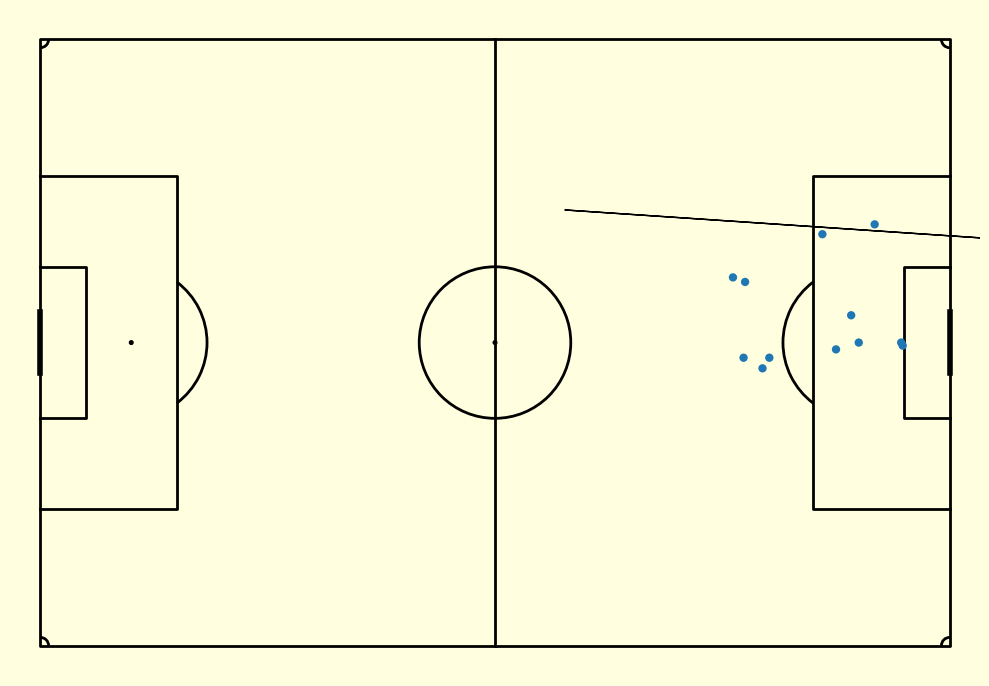

In [340]:
figSizeX = 10
figSizeY = 7.727
fig, ax = pitch_gray.draw(figsize=(figSizeX, figSizeY))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
plt.arrow(69.2,57.5,120.0-57.5,53.3-57.5,head_width=1, head_length=1,zorder=6)
shots[shots.shot_statsbomb_xg==  min(shots.shot_statsbomb_xg)][["timestamp","period","player_name","x","y","end_x","end_y"]]
df = shots[shots.team_name == 'Leicester City']
sns.scatterplot(x='x', y='y', data=df, ec=None,alpha=1, palette='Blues',zorder=3, legend=False)
plt.gca().invert_yaxis()

C:\Users\murat\AppData\Local\Temp\ipykernel_22116\3657011878.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm1, label='Colorbar 1')
C:\Users\murat\AppData\Local\Temp\ipykernel_22116\3657011878.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm2, label='Colorbar 2')


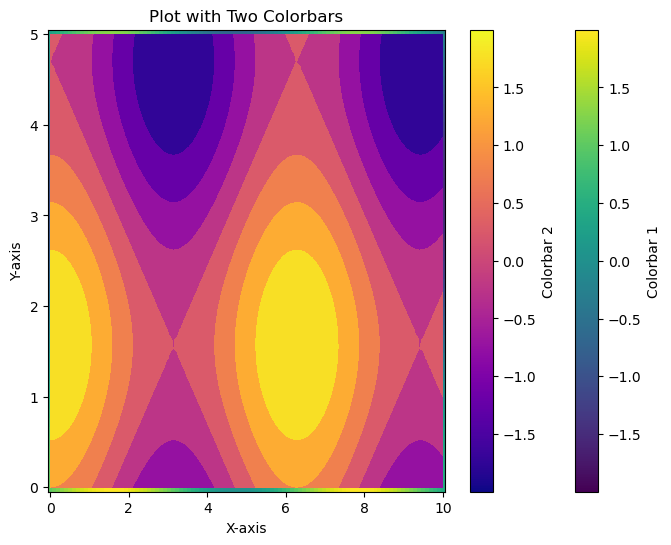

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Generate some example data
x = np.linspace(0, 10, 100)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X) + np.cos(Y)
Z2 = np.cos(X) + np.sin(Y)

# Create a custom color scale and normalize it
norm1 = Normalize(vmin=np.min(Z1), vmax=np.max(Z1))
norm2 = Normalize(vmin=np.min(Z2), vmax=np.max(Z2))

# Create a ScalarMappable for each color scale
cmap1 = plt.get_cmap('viridis')  # Choose a colormap
sm1 = ScalarMappable(cmap=cmap1, norm=norm1)
sm1.set_array([])

cmap2 = plt.get_cmap('plasma')  # Choose another colormap
sm2 = ScalarMappable(cmap=cmap2, norm=norm2)
sm2.set_array([])

# Create your plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, Z1, cmap=cmap1, shading='auto')
plt.colorbar(sm1, label='Colorbar 1')

# Add a second color scale to the same plot
plt.contourf(X, Y, Z2, cmap=cmap2)
plt.colorbar(sm2, label='Colorbar 2')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot with Two Colorbars')
plt.show()


In [342]:
min(shots.shot_statsbomb_xg)

0.0038485425

In [195]:
goal_arr = np.array(goal_coor)
print(goal_arr)
goal_arr[np.where((goal_arr <=107+1) & (goal_arr >=107-1) )]

shots.shot_statsbomb_xg

[[107.7  36.7]
 [103.7  37.4]]


479     0.047457
497     0.059493
594     0.466867
785     0.018788
846     0.553493
1210    0.027663
1216    0.107173
1240    0.030402
1392    0.057614
1540    0.003849
1577    0.127294
1884    0.783500
1931    0.084619
1952    0.069871
2169    0.041610
2188    0.058197
2194    0.026870
2271    0.022614
2455    0.218477
2670    0.032022
2766    0.055452
3257    0.041740
Name: shot_statsbomb_xg, dtype: float64

212


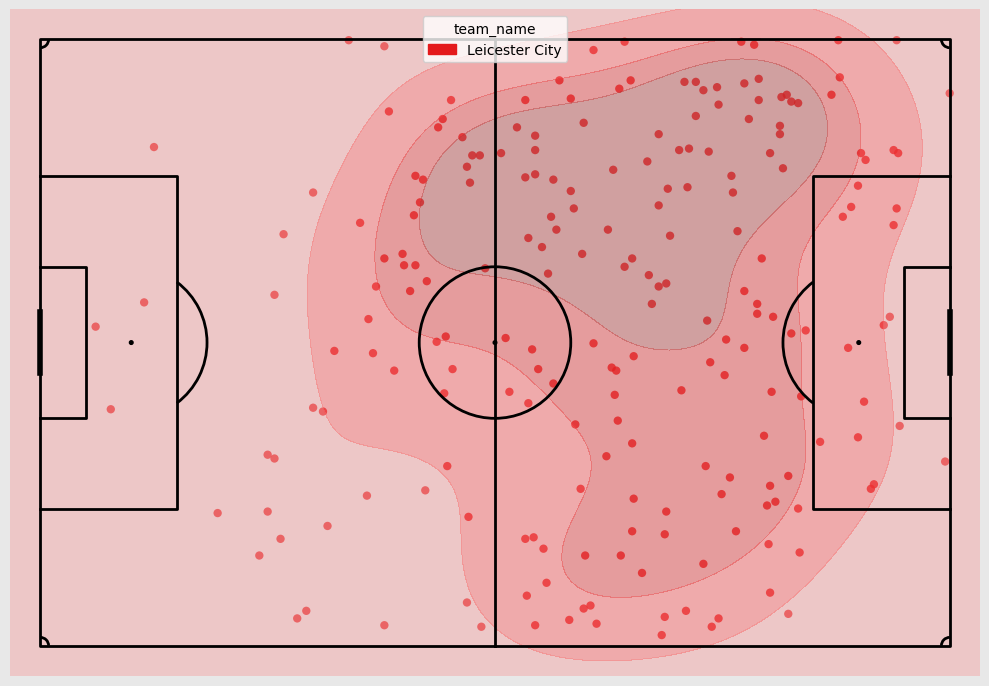

In [16]:
import seaborn as sns
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#E8E8E8')
ax.patch.set_facecolor('#E8E8E8')
plt.gca().invert_yaxis()
df_passes = df_event[(df_event['type_name'] == 'Pass')&(df_event['team_name'] == 'Leicester City')&(df_event['period'] == 2)]
print(len(df_passes))
# Plot the pass receipt locations
#pitch.scatter(, df_passes['end_y'], s=20, color='purple',alpha=.6 ,ax=ax)

sns.scatterplot(x='end_x', y='end_y', data=df_passes, hue='team_name', ec=None,alpha=.8, palette='Set1')
sns.kdeplot(x='end_x', y='end_y', data=df_passes, hue='team_name', ec=None,alpha=.4, palette='Set1', fill=True, hade_lowest=False, thresh=0, n_levels=5,cmap='mako',legend=True)


plt.title
plt.show()

307